In [8]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

In [9]:
model = resnet50(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/aamikhaylov/.torch/models/resnet50-19c8e357.pth
102502400it [00:09, 11028268.16it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [10]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg'

--2019-07-25 14:33:11--  https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789779 (771K) [image/jpeg]
Saving to: ‘An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg’

An_up-close_picture 100%[===================>] 771.27K  2.80MB/s    in 0.3s    

2019-07-25 14:33:11 (2.80 MB/s) - ‘An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg’ saved [789779/789779]



In [40]:
import albumentations as A
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [116]:
image = cv2.imread('An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = image/255.

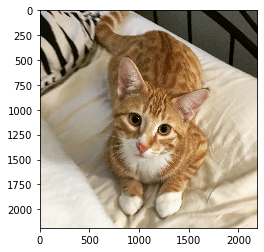

In [93]:
plt.imshow(image)

In [117]:
preprocess = A.Compose([A.Resize(224,224)])
preprocess

Compose([
  Resize(always_apply=False, p=1, height=224, width=224, interpolation=1),
], p=1.0, bbox_params={}, keypoint_params={}, additional_targets={})

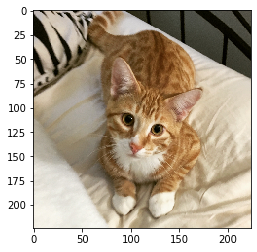

In [122]:
plt.imshow(preprocess(image=image)['image'])
t = torch.tensor(preprocess(image=image)['image'], dtype=torch.float).permute(2,0,1).unsqueeze(0)

In [123]:
t = t.clamp(0,1)

In [124]:
import requests

# class labels
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [125]:
label = int(model(t).argmax())
labels[label]

'bucket, pail'

In [ ]:
from torchvision.models import resnet50
model = resnet50(pretrained=True)